In [113]:
# 3. Import libraries and modules
import numpy as np
np.random.seed(123)  # for reproducibility
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D,Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

In [3]:
# 4. Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [7]:
import pandas as pd
#ev. ist es nötig, den folgenden Befehl auszuführen:
!chmod 644 train.csv

In [81]:
df_NotMNIST = pd.read_csv('train.csv',header=None,index_col=0)
df_NotMNIST.head()

,1,2,3,4,5,6,7,8,9,10,...,776,777,778,779,780,781,782,783,784,785
0,,,,,,,,,,,,,,,,,,,,,
0,A,0,0,0,0,0,0,0,0,0,...,0,0,9,19,4,30,11,8,77,13
1,A,255,255,255,255,255,255,255,255,255,...,0,0,4,0,153,255,251,255,255,255
2,A,0,0,0,0,0,0,0,0,0,...,114,114,117,117,117,117,115,114,96,19
3,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,24,90,99,28
4,A,0,0,0,0,2,0,80,221,223,...,0,0,2,0,180,255,243,244,255,103


In [82]:
X_NotMNIST = df.values[:,1:]
X_NotMNIST = X.reshape(-1,28,28,1)
X_NotMNIST.shape

(9360, 28, 28, 1)

In [85]:
from sklearn.preprocessing import OneHotEncoder
#OneHotEncoder?
ohe = OneHotEncoder()
y_NotMNIST = df_NotMNIST[1]
#y_ohe = ohe.fit_transform(y)
y_NotMNIST_int = y_NotMNIST.map({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'F':7,'H':8,'I':9,'J':10})
#Äquivalent, aber weniger transparent:
#pd.Series(y_NotMNIST.unique()).map(ord)-65

In [86]:
y_NotMNIST_int.unique()

array([ 0,  1,  2,  3,  4,  7,  6,  8,  9, 10])

In [88]:
y_NotMNIST_ohe = ohe.fit_transform(y_NotMNIST_int.values.reshape(-1,1))
print(y_ohe.shape)
y_NotMNIST_ohe = y_NotMNIST_ohe.todense() #nicht sehr effizient, aber wir haben ja auch nur wenig Daten...

(9360, 10)


In [77]:
# 5. Preprocess input data
X_train = X_train.reshape(X_train.shape[0],  28, 28,1)
X_test = X_test.reshape(X_test.shape[0],  28, 28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
X_train.shape

(60000, 28, 28, 1)

In [68]:
# 6. Preprocess class labels
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [89]:
# 7. Define model architecture
model = Sequential()
model.add(Convolution2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(32, 3, 3, activation='relu',name='myconv1'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu',name='mydense1'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

/home/toedtli/.virtualenvs/v_py3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", name="myconv2")`
  after removing the cwd from sys.path.


In [90]:
# 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [91]:
# 9. Fit model on training data
hist = model.fit(X_NotMNIST, y_NotMNIST_ohe, 
          batch_size=32, nb_epoch=10, verbose=1)

/home/toedtli/.virtualenvs/v_py3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
9360/9360 [==============================] - 21s 2ms/step - loss: 13.3434 - acc: 0.1702
Epoch 2/10
9360/9360 [==============================] - 21s 2ms/step - loss: 12.8485 - acc: 0.2021
Epoch 3/10
9360/9360 [==============================] - 21s 2ms/step - loss: 14.1538 - acc: 0.1218
Epoch 4/10
9360/9360 [==============================] - 21s 2ms/step - loss: 13.8924 - acc: 0.1378
Epoch 5/10
9360/9360 [==============================] - 21s 2ms/step - loss: 13.5495 - acc: 0.1592
Epoch 6/10
9360/9360 [==============================] - 22s 2ms/step - loss: 13.7364 - acc: 0.1474
Epoch 7/10
9360/9360 [==============================] - 21s 2ms/step - loss: 13.7994 - acc: 0.1437
Epoch 8/10
9360/9360 [==============================] - 21s 2ms/step - loss: 13.7683 - acc: 0.1457
Epoch 9/10
9360/9360 [==============================] - 21s 2ms/step - loss: 13.6199 - acc: 0.1549
Epoch 10/10
9360/9360 [==============================] - 22s 2ms/step - loss: 13.6396 - acc: 0.1537


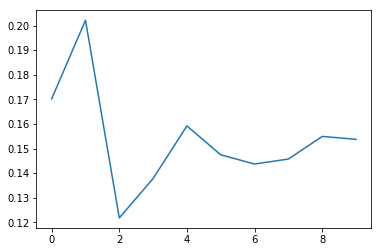

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(hist.history['acc'])

In [97]:
# 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=0)
score

[7.8217011848449705, 0.1032]

In [105]:
# 7. Define model architecture
model2 = Sequential()
model2.add(Convolution2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model2.add(Convolution2D(32, (3, 3), activation='relu',name='myconv2'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

model2.add(Convolution2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model2.add(Convolution2D(32, (3, 3), activation='relu',name='myconv3'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
 
model2.add(Flatten())
model2.add(Dense(128, activation='relu',name='mydense1'))
model2.add(Dense(128, activation='relu',name='mydense2'))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))

# 8. Compile model
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [107]:
# 9. Fit model on training data
hist2 = model2.fit(X_NotMNIST, y_NotMNIST_ohe, 
          batch_size=32, epochs=10, validation_split=0.1,verbose=1)

Epoch 1/10
9360/9360 [==============================] - 21s 2ms/step - loss: 0.9952 - acc: 0.6928
Epoch 2/10
9360/9360 [==============================] - 23s 2ms/step - loss: 0.5514 - acc: 0.8424
Epoch 3/10
9360/9360 [==============================] - 22s 2ms/step - loss: 0.4327 - acc: 0.8731
Epoch 4/10
9360/9360 [==============================] - 24s 3ms/step - loss: 0.3812 - acc: 0.8854
Epoch 5/10
9360/9360 [==============================] - 22s 2ms/step - loss: 0.3447 - acc: 0.8926
Epoch 6/10
9360/9360 [==============================] - 21s 2ms/step - loss: 0.3152 - acc: 0.9071
Epoch 7/10
9360/9360 [==============================] - 22s 2ms/step - loss: 0.3001 - acc: 0.9111
Epoch 8/10
9360/9360 [==============================] - 23s 2ms/step - loss: 0.2907 - acc: 0.9135
Epoch 9/10
9360/9360 [==============================] - 21s 2ms/step - loss: 0.2589 - acc: 0.9198
Epoch 10/10
9360/9360 [==============================] - 23s 2ms/step - loss: 0.2548 - acc: 0.9246


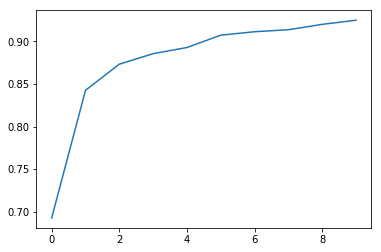

In [110]:
plt.plot(hist2.history['acc'])

In [111]:
# 10. Evaluate model on test data
model2.evaluate?
score = model2.evaluate(X_test, Y_test, verbose=0)
score

[2.4579242805480956, 0.0958]

10

In [125]:
from keras.layers import Conv2D,BatchNormalization,ZeroPadding2D
from keras.regularizers import l2
l2_reg = 0.05
n_classes = Y_train.shape[1]

alexnet = Sequential()
alexnet.add(Conv2D(96, (11, 11), input_shape=(28,28,1),
    padding='same', kernel_regularizer=l2(l2_reg)))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 2
alexnet.add(Conv2D(256, (5, 5), padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 3
alexnet.add(ZeroPadding2D((1, 1)))
alexnet.add(Conv2D(512, (3, 3), padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 6
alexnet.add(Flatten())
alexnet.add(Dense(3072))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(Dropout(0.5))

# Layer 7
alexnet.add(Dense(4096))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(Dropout(0.5))

# Layer 8
alexnet.add(Dense(n_classes))
alexnet.add(BatchNormalization())
alexnet.add(Activation('softmax'))

In [126]:
# 8. Compile model
alexnet.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# 9. Fit model on training data
hist3 = alexnet.fit(X_NotMNIST, y_NotMNIST_ohe, 
          batch_size=32, epochs=10, validation_split=0.1, verbose=1)

Train on 8424 samples, validate on 936 samples
Epoch 1/10
8424/8424 [==============================] - 453s 54ms/step - loss: 0.7493 - acc: 0.8745 - val_loss: 3.2689 - val_acc: 0.0000e+00
Epoch 2/10
8424/8424 [==============================] - 445s 53ms/step - loss: 0.4959 - acc: 0.9182 - val_loss: 3.4762 - val_acc: 0.0000e+00
Epoch 3/10
8424/8424 [==============================] - 445s 53ms/step - loss: 0.4164 - acc: 0.9257 - val_loss: 4.2952 - val_acc: 0.0000e+00
Epoch 4/10
8424/8424 [==============================] - 446s 53ms/step - loss: 0.3650 - acc: 0.9283 - val_loss: 4.9391 - val_acc: 0.0000e+00
Epoch 5/10
8424/8424 [==============================] - 435s 52ms/step - loss: 0.3095 - acc: 0.9408 - val_loss: 4.8965 - val_acc: 0.0000e+00
Epoch 6/10
8424/8424 [==============================] - 432s 51ms/step - loss: 0.2741 - acc: 0.9486 - val_loss: 5.8508 - val_acc: 0.0000e+00
Epoch 7/10
8424/8424 [==============================] - 432s 51ms/step - loss: 0.2372 - acc: 0.9569 - val_l